<a href="https://colab.research.google.com/github/egyptai/DecisionTree/blob/main/20210607DecisionTreeTitanic(Error).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
myfile = files.upload()

Saving train.csv to train.csv


In [11]:
!ls -l

total 64
drwxr-xr-x 1 root root  4096 Jun  1 13:40 sample_data
-rw-r--r-- 1 root root 61194 Jun  7 01:17 train.csv


In [14]:
import pandas as pd

train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test = pd.read_csv("train.csv")
print(test.shape)
test.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

In [18]:
train["Embarked_C"]=train["Embarked"]=="C"
train["Embarked_S"]=train["Embarked"]=="S"
train["Embarked_Q"]=train["Embarked"]=="Q"

print(train.shape)
train.head()

(891, 15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,False,True,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,False,True,False


In [19]:
mean_fare = train["Fare"].mean()
test[pd.isnull(test["Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [20]:
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare
test[pd.isnull(test["Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [22]:
feature_names = ["Pclass", "Sex", "Fare",
                 "Embarked_C", "Embarked_Q", "Embarked_S"]

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,7.2500,False,False,True
1,1,1,71.2833,True,False,False
2,3,1,7.9250,False,False,True
3,1,1,53.1000,False,False,True
4,3,0,8.0500,False,False,True


In [23]:
label_name = "Survived"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [25]:
from sklearn.tree import DecisionTreeClassifier
seed = 37
model = DecisionTreeClassifier(max_depth=5,
                               random_state=seed)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=37, splitter='best')

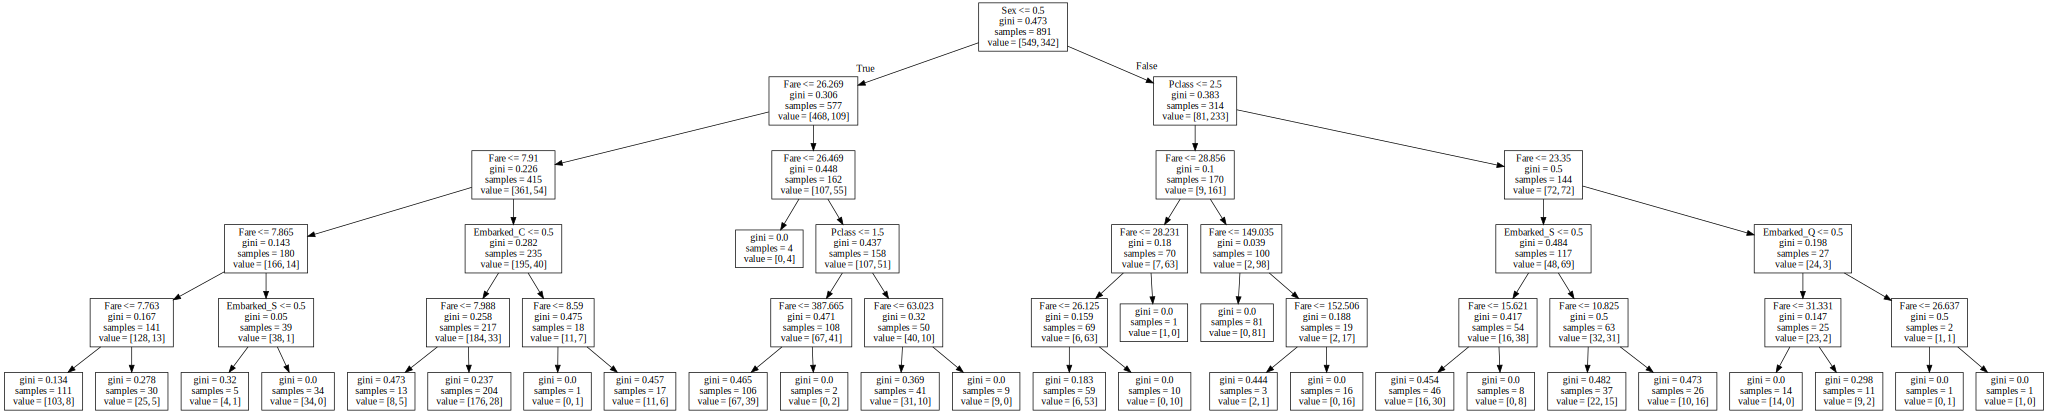

In [26]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(model,
                feature_names=feature_names,
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [27]:
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

In [28]:
test["Embarked_C"] = train["Embarked"] == "C"
test["Embarked_S"] = train["Embarked"] == "S"
test["Embarked_Q"] = train["Embarked"] == "Q"

In [29]:
from google.colab import files
myfile = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [31]:
X_test = test[feature_names]
prediction = model.predict(X_test)
submission = pd.read_csv("gender_submission.csv")
submission["Survived"] = prediction
print(submission.shape)
submission.head()

ValueError: ignored